In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df_test = pd.read_parquet('proyecto_ML/x_test.parquet')
df_train = pd.read_parquet('proyecto_ML/x_train.parquet')

In [24]:
# Reduciendo la data temporalmente con la finalidad de acelerar las pruebas
df_train = df_train.sample(35000)

In [ ]:
df_train.info()

In [33]:
# Separando features de target
X = df_train.iloc[:, [0,83]].values
Y = df_train.iloc[:, 84].values

In [34]:
# Separamos los datos de entrenamiento de los datos de prueba
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [35]:
# Estandarizamos 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [36]:
# Entrenamos
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [37]:
# Predecimos
Y_Pred = classifier.predict(X_Test)

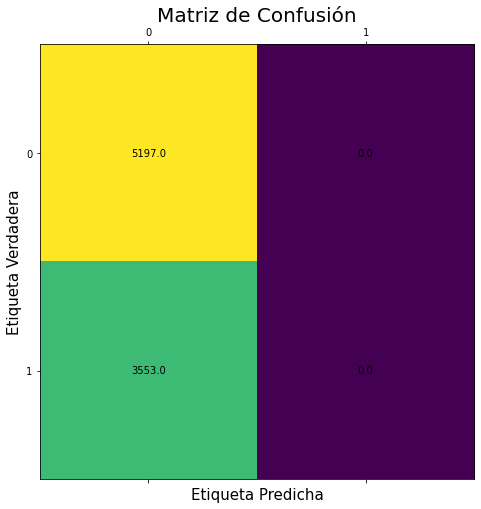

In [38]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [39]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.75      5197
           1       0.00      0.00      0.00      3553

    accuracy                           0.59      8750
   macro avg       0.30      0.50      0.37      8750
weighted avg       0.35      0.59      0.44      8750



c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av